In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import sys
sys.path.insert(0,'C:/Users/이세령/picasso/KOSDAQ-Gap-Strategy/CODE')
import mylib
matplotlib.rc('font', family='Malgun Gothic',size=8, weight = 'bold')

In [238]:
KOSDAQTIK = pd.read_excel('C:/Users/이세령/picasso/KOSDAQ-Gap-Strategy/DATA/KOSDAQTIK.xlsx', header=2)

In [239]:
KOSDAQTIK.head()

,Date,OPEN,LAST_PRICE
0,NaT,665.67,665.78
1,2017-06-30 09:05:00,665.71,667.36
2,2017-06-30 09:10:00,667.45,667.60
3,2017-06-30 09:15:00,667.49,667.64
4,2017-06-30 09:20:00,667.70,667.49


In [240]:
KOSDAQTIK.dtypes

Date          datetime64[ns]
OPEN                 float64
LAST_PRICE           float64
dtype: object

In [241]:
KOSDAQTIK['hour'] = KOSDAQTIK.Date.dt.hour

In [242]:
KOSDAQTIK['minute'] = KOSDAQTIK.Date.dt.minute

In [243]:
KOSDAQTIK['Date'].dt.day.head()

0     NaN
1    30.0
2    30.0
3    30.0
4    30.0
Name: Date, dtype: float64

In [244]:
buy = KOSDAQTIK[(KOSDAQTIK.hour.between(15,15)) & (KOSDAQTIK.minute.between(30,30))].OPEN

In [245]:
buy.head()

78     669.10
157    661.44
236    656.67
315    661.46
394    663.97
Name: OPEN, dtype: float64

In [246]:
%matplotlib inline

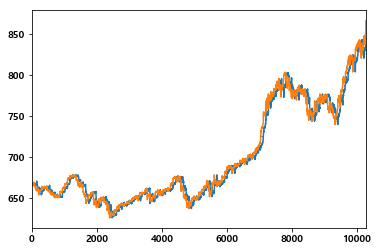

In [247]:
KOSDAQTIK.OPEN.shift(79).plot()
KOSDAQTIK.LAST_PRICE.plot()

In [248]:
sell = KOSDAQTIK[(KOSDAQTIK.hour <= 9) & (KOSDAQTIK.minute.between(0,0))].OPEN

In [249]:
sell.head()

79     671.17
158    662.17
237    657.70
316    663.79
395    662.66
Name: OPEN, dtype: float64

In [250]:
buy.head()

78     669.10
157    661.44
236    656.67
315    661.46
394    663.97
Name: OPEN, dtype: float64

In [251]:
KOSDAQTIK['buy'] = buy

In [252]:
KOSDAQTIK['sell'] = sell

In [253]:
KOSDAQTIK['buy'].dropna().head()

78     669.10
157    661.44
236    656.67
315    661.46
394    663.97
Name: buy, dtype: float64

In [254]:
s = KOSDAQTIK['sell'].dropna()

In [255]:
s.head()

79     671.17
158    662.17
237    657.70
316    663.79
395    662.66
Name: sell, dtype: float64

In [256]:
gain = pd.Series((sell.values-buy.values)/buy.values)

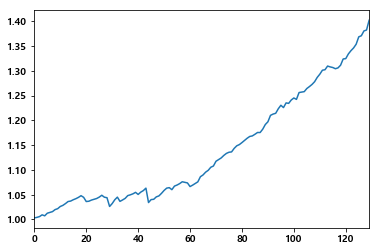

In [258]:
(1+gain).cumprod().plot()

In [260]:
(1+gain).cumprod().tail()

125    1.368596
126    1.370893
127    1.380568
128    1.382422
129    1.402161
dtype: float64

In [299]:
len(gain[gain>0])/len(gain)

0.8461538461538461

In [301]:
gain.mean()

0.002614632354207046

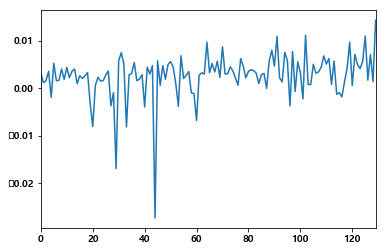

In [303]:
gain.plot()

In [305]:
KOSDAQTIK.head()

,Date,OPEN,LAST_PRICE,hour,minute,buy,sell
0,NaT,665.67,665.78,NaN,NaN,NaN,NaN
1,2017-06-30 09:05:00,665.71,667.36,9.0,5.0,NaN,NaN
2,2017-06-30 09:10:00,667.45,667.60,9.0,10.0,NaN,NaN
3,2017-06-30 09:15:00,667.49,667.64,9.0,15.0,NaN,NaN
4,2017-06-30 09:20:00,667.70,667.49,9.0,20.0,NaN,NaN


In [398]:
def bet(data):
    start = 0.10
    cir = 0
    max_cir = 8
    for i in data:
        if i==True and cir <= max_cir:
            cir +=1
            weight = start*cir
        else:
            cir = 1
            weight = start*cir
        print(weight)

In [429]:
gain.values[1-1]

0.0030937079659242809

In [370]:
gain>0

0       True
1       True
2       True
3       True
4      False
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19     False
20     False
21      True
22      True
23      True
24      True
25      True
26      True
27     False
28     False
29     False
       ...  
100     True
101    False
102     True
103     True
104     True
105     True
106     True
107     True
108     True
109     True
110     True
111     True
112     True
113     True
114    False
115    False
116    False
117     True
118     True
119     True
120     True
121     True
122     True
123     True
124     True
125     True
126     True
127     True
128     True
129     True
Length: 130, dtype: bool